<a href="https://www.kaggle.com/code/mrsimple07/diabetes-analysis-eda-prediction?scriptVersionId=184165790" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-diabities/diabetes.csv


# Diabetes Analysis: Exploratory Data Analysis (EDA) and Prediction

## Introduction

Diabetes is a prevalent chronic disease characterized by high levels of blood glucose resulting from defects in insulin production, insulin action, or both. It affects millions of people worldwide and has significant implications for health care systems and individual well-being.

This Kaggle notebook presents an in-depth analysis of diabetes using both exploratory data analysis (EDA) techniques and predictive modeling. The dataset used for this analysis contains various factors related to diabetes, such as glucose levels, blood pressure, body mass index (BMI), and other relevant metrics.

In this notebook, we'll start by conducting exploratory data analysis to gain insights into the distribution of different features, identify patterns, and understand relationships between variables. Following the EDA, we'll delve into predictive modeling to develop a model capable of predicting the onset of diabetes based on the provided data.

The goals of this analysis are as follows:
1. **Exploratory Data Analysis (EDA):** We aim to explore the dataset, visualize key features, and uncover patterns or trends related to diabetes.
2. **Predictive Modeling:** Using machine learning algorithms, we seek to build a model that can accurately predict the likelihood of diabetes based on the available data.
3. **Insights and Interpretations:** Throughout the analysis, we'll strive to provide actionable insights that may aid in understanding diabetes risk factors and improving preventative measures.

By the end of this analysis, we hope to provide valuable insights into diabetes, both from a descriptive and predictive standpoint, which may contribute to better understanding and management of this widespread disease.

Let's get started!


# Importing Libraries and Data

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/predict-diabities/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis (EDA)

### 1. Distribution of Glucose Levels

We'll begin by examining the distribution of glucose levels among the individuals in the dataset. Glucose levels are a key indicator in diabetes diagnosis and management, so understanding their distribution can provide valuable insights into the overall health status of the population under study.

### 2. Pairwise Relationships and Distributions

Next, we'll explore pairwise relationships between different features in the dataset. This analysis will involve creating scatter plots or pair plots to visualize the relationships between variables such as glucose levels, blood pressure, BMI, and others. Understanding these relationships can help identify potential correlations and dependencies between variables.

### 3. Correlation Matrix between Features

To further investigate the relationships between features, we'll construct a correlation matrix. This matrix will quantify the correlation coefficients between each pair of variables in the dataset, providing a comprehensive overview of the strength and direction of their relationships. This analysis will help identify which features are most strongly correlated with each other and may potentially serve as predictors for diabetes.

### 4. Distribution of Diabetes

We'll also analyze the distribution of diabetes within the dataset. This will involve examining the proportion of individuals with diabetes compared to those without diabetes. Understanding the distribution of diabetes within the population is crucial for assessing the prevalence of the disease and its potential impact on other variables.

### 5. Violin Plot of the Distribution of a Numerical Variable

Lastly, we'll create a violin plot to visualize the distribution of a numerical variable, such as BMI or age, across different categories of diabetes. This plot will allow us to compare the distributions of the variable between diabetic and non-diabetic individuals, providing insights into potential differences or patterns associated with diabetes status.

Through these exploratory analyses, we aim to gain a deeper understanding of the dataset and uncover important insights related to diabetes and its associated factors.

Let's dive into the exploratory data analysis!

#### 1. Distribution of Glucose Levels

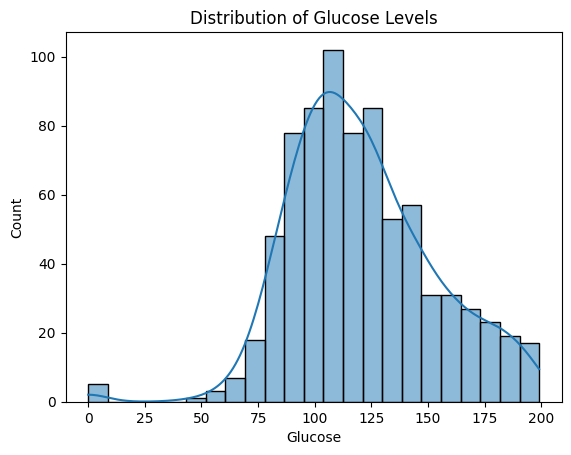

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Glucose'], kde= True)
plt.title('Distribution of Glucose Levels')
plt.show()

#### 2. Pairwise Relationships and Distributions

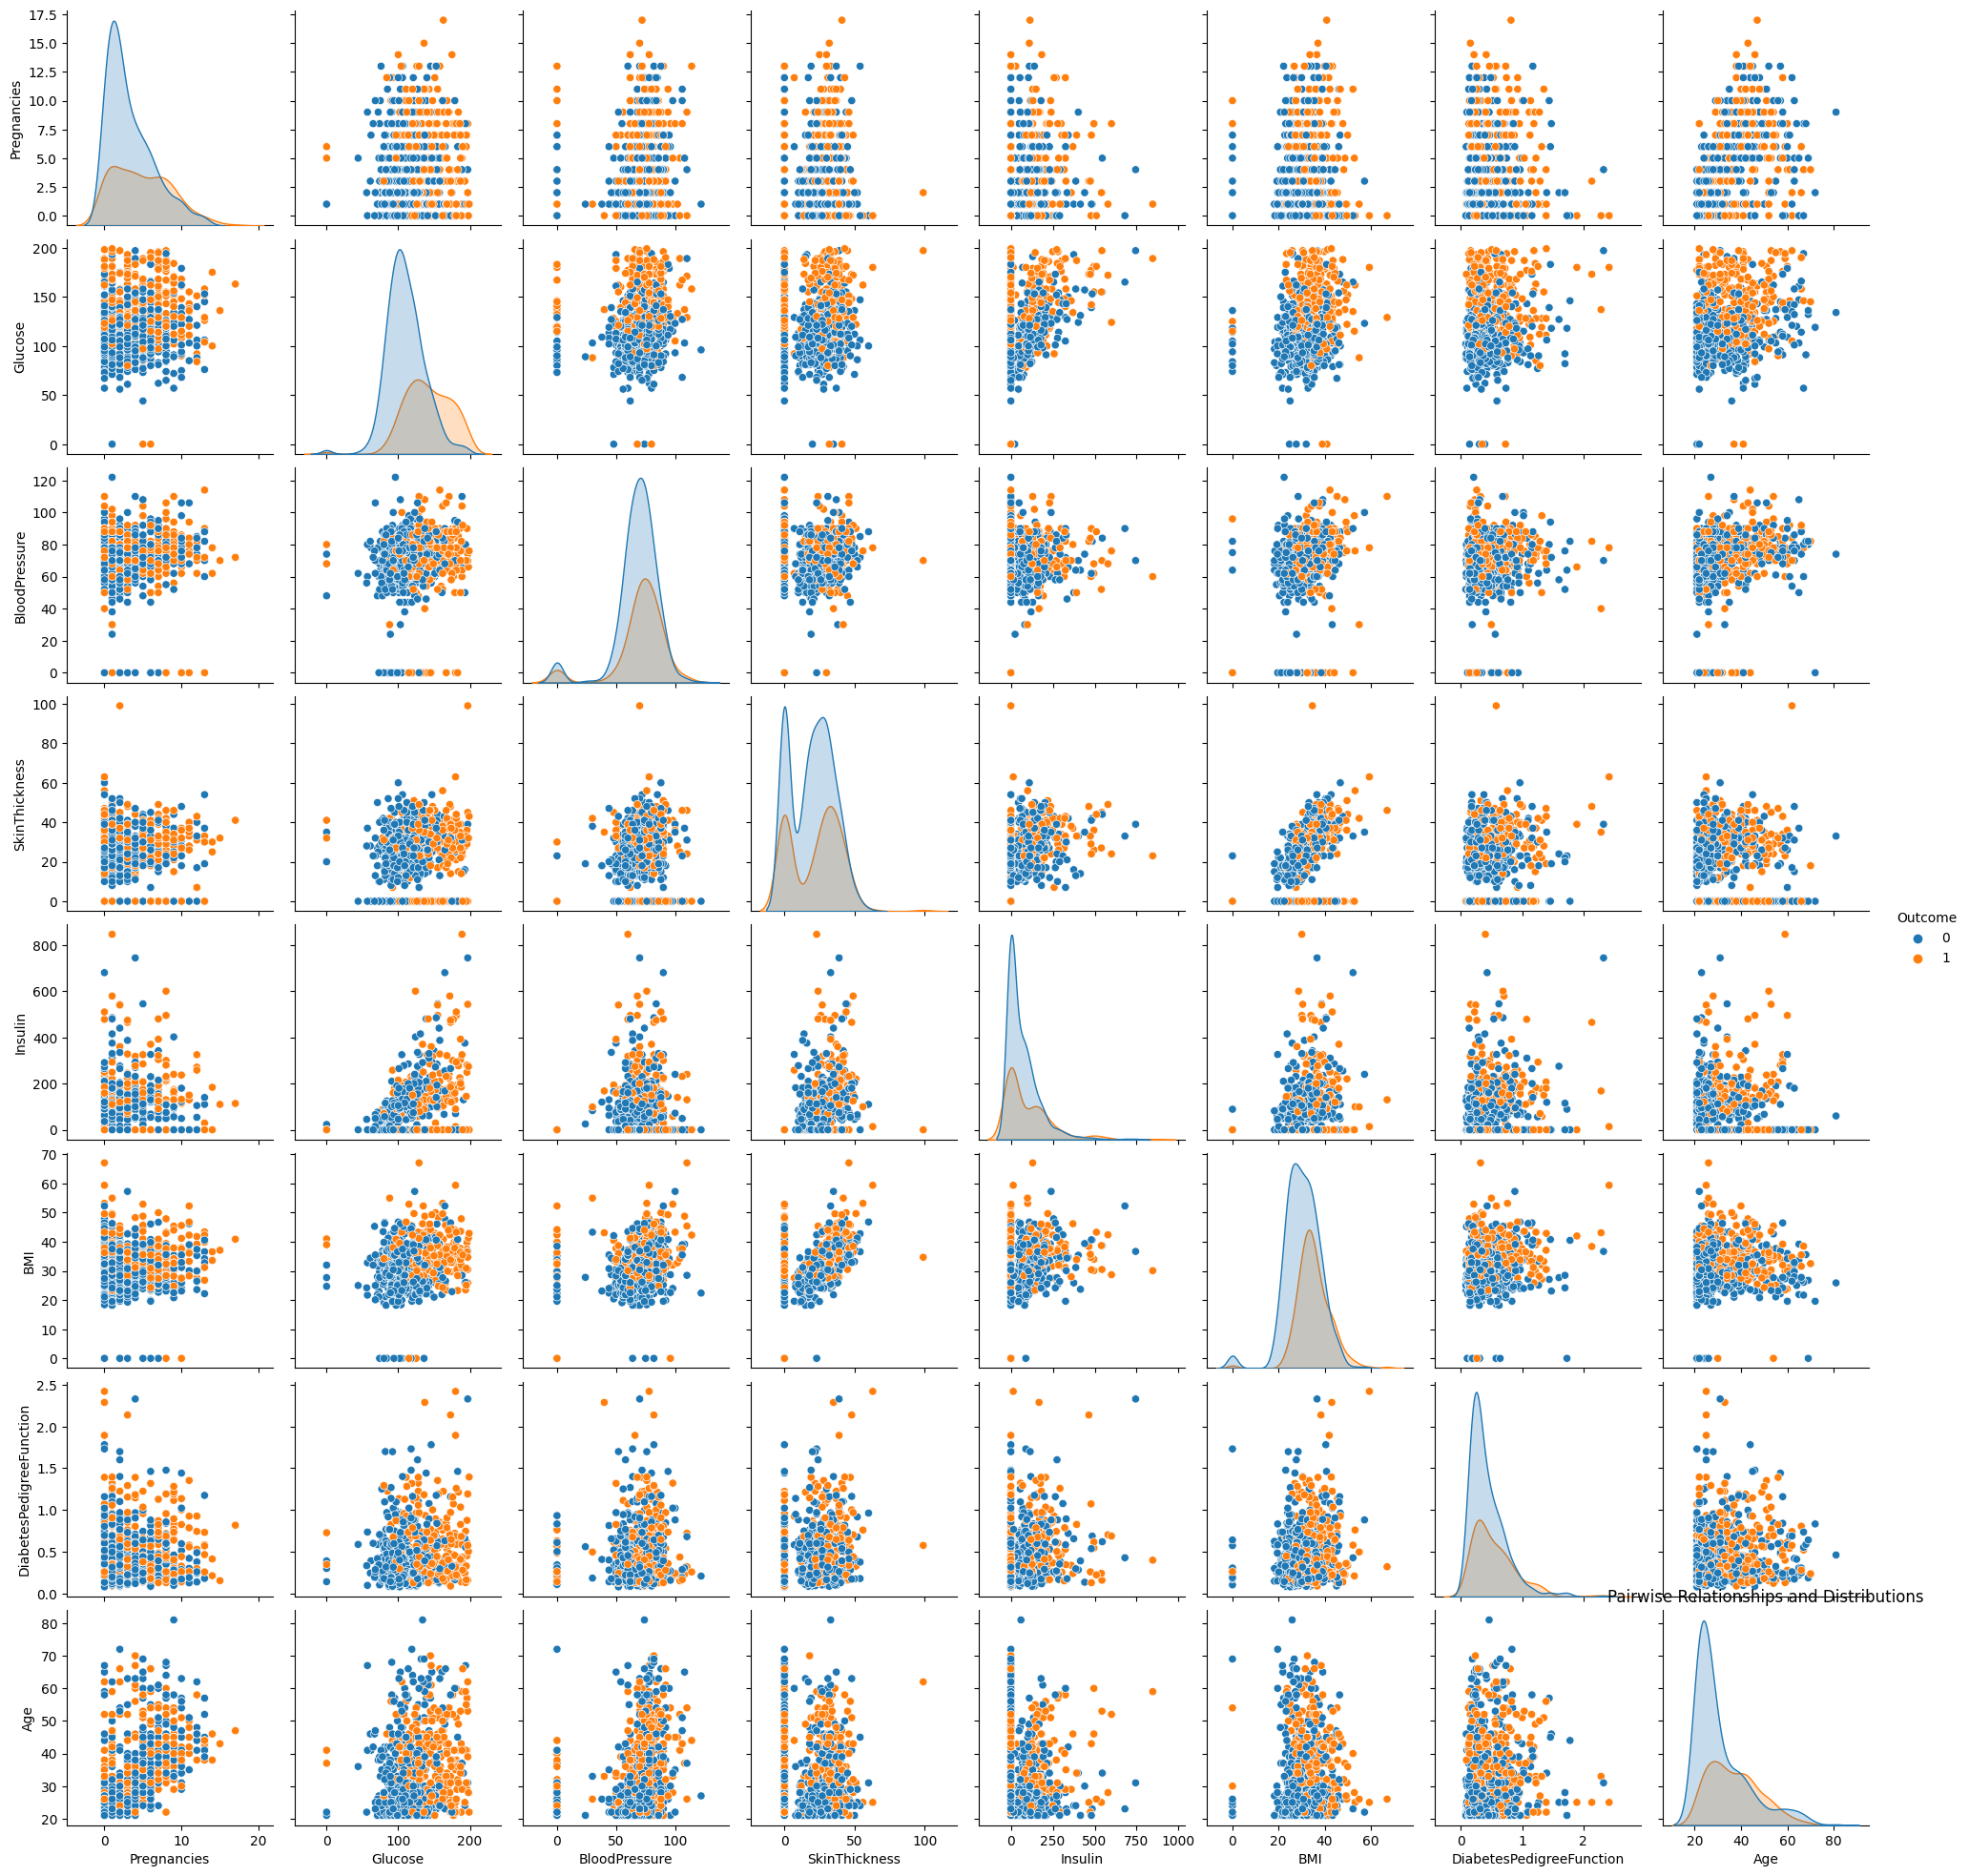

In [7]:
sns.pairplot(df, hue ='Outcome')
plt.title('Pairwise Relationships and Distributions')
plt.show()

#### 3. Correation matrix between features

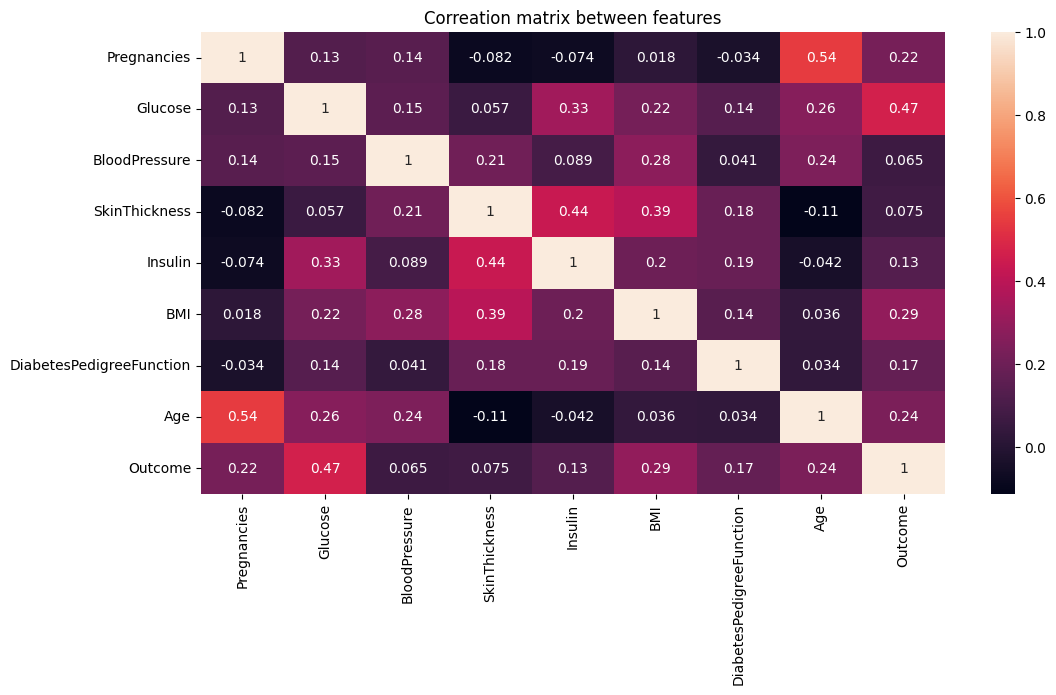

In [8]:
plt.figure(figsize = (12,6))
cm = df.corr()
sns.heatmap(cm, annot = True)
plt.title('Correation matrix between features')
plt.show()

#### 4. Distribution of the diabetes

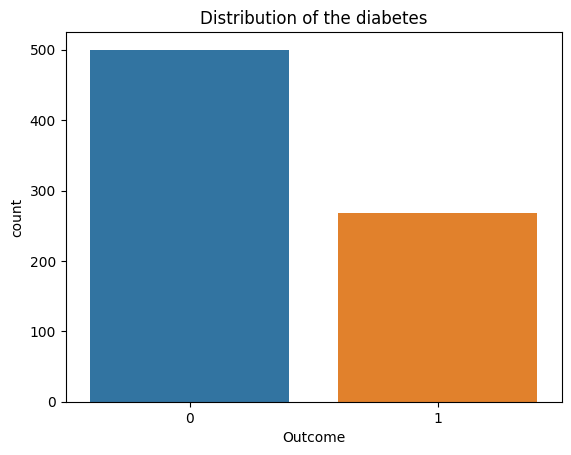

In [9]:
sns.countplot(x = 'Outcome', data =df)
plt.title('Distribution of the diabetes')
plt.show()

#### 5. Violin plot of the distribution of a numerical variable
Violin plots to show the distribution of a numerical variable across different classes of the target variable.

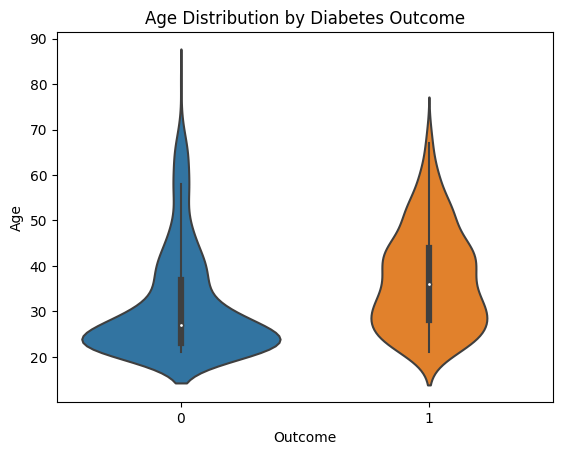

In [10]:
sns.violinplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

# Model Building and Evaluation

## Model Building and Evaluation

### 1. Simple Evaluation Models with Decision Tree (DT), Random Forest (RF), Logistic Regression (LR), Support Vector Machine (SVM)

In this section, we'll start by building and evaluating simple machine learning models using popular algorithms such as Decision Tree, Random Forest, Logistic Regression, and Support Vector Machine. These models will serve as baselines for comparison with more complex models later in the analysis.

For each model, we'll follow these steps:
- **Data Splitting:** We'll split the dataset into training and testing sets to train the model on a portion of the data and evaluate its performance on unseen data.
- **Model Training:** We'll train each model using the training data.
- **Model Evaluation:** We'll evaluate the performance of each model using various metrics such as accuracy, precision, recall, and F1-score. Additionally, we may visualize the performance metrics using confusion matrices or ROC curves to gain further insights into model performance.

### 2. Optuna with XGBoost Classifier

Optuna is a hyperparameter optimization framework that can be used to automatically search for the best hyperparameters of a machine learning model. In this section, we'll utilize Optuna to perform hyperparameter optimization for an XGBoost classifier.

The steps involved in this process include:
- **Defining Objective Function:** We'll define an objective function that Optuna will optimize. This function typically involves training a model with a specific set of hyperparameters and evaluating its performance on a validation set.
- **Setting Hyperparameter Search Space:** We'll specify the hyperparameters to be optimized and their respective search spaces.
- **Running Optimization:** We'll run the Optuna optimization process to search for the best hyperparameters for the XGBoost classifier.
- **Model Training and Evaluation:** Finally, we'll train the XGBoost classifier using the optimal hyperparameters obtained from Optuna and evaluate its performance on the test set.

By leveraging Optuna for hyperparameter optimization, we aim to improve the performance of the XGBoost classifier and potentially achieve better predictive accuracy compared to the simple evaluation models.

Let's proceed with building and evaluating the models!


### Importing libraries and model building

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')

In [12]:
X = df.drop(['Outcome'], axis =1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, log_reg_pred)
conf_matrix = confusion_matrix(y_test, log_reg_pred)
classification_rep = classification_report(y_test, log_reg_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.7467532467532467
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Let's build other models as well and compare them.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train and evaluate each model
models = [logreg_model, decision_tree_model, random_forest_model, svm_model]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("="*50)


Model: LogisticRegression
Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Model: DecisionTreeClassifier
Accuracy: 0.75
Confusion Matrix:
[[75 24]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Model: RandomForestClassifier
Accuracy: 0.72
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  

# Optuna with XGBCLassifier

In [14]:
import optuna
from xgboost import XGBClassifier

def objective(trial):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    return model.score(X_valid, y_valid)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print("Best score:", best_score)
print("Best parameters:", best_params)

[I 2024-06-18 11:42:54,210] A new study created in memory with name: no-name-c7b91737-60c7-4786-8484-dbe1cbe8f0f3
[I 2024-06-18 11:42:54,828] Trial 0 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 893, 'max_depth': 6, 'learning_rate': 0.19289510205424082, 'subsample': 0.754967889891907, 'colsample_bytree': 0.8909129910823829}. Best is trial 0 with value: 0.7142857142857143.
[I 2024-06-18 11:42:55,021] Trial 1 finished with value: 0.7077922077922078 and parameters: {'n_estimators': 368, 'max_depth': 3, 'learning_rate': 0.2369882242889062, 'subsample': 0.9868951534346135, 'colsample_bytree': 0.5424660069672742}. Best is trial 0 with value: 0.7142857142857143.
[I 2024-06-18 11:42:55,411] Trial 2 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 446, 'max_depth': 9, 'learning_rate': 0.061197996558202704, 'subsample': 0.8911838606008764, 'colsample_bytree': 0.8027393758614827}. Best is trial 2 with value: 0.7597402597402597.
[I 2024-06-18 11:

Best score: 0.8116883116883117
Best parameters: {'n_estimators': 324, 'max_depth': 10, 'learning_rate': 0.07398259964772916, 'subsample': 0.7045912093311724, 'colsample_bytree': 0.6240622753009664}


In [15]:
best_params= {'n_estimators': 323, 'max_depth': 4, 'learning_rate': 0.0426194945935678, 'subsample': 0.7824905729098909, 'colsample_bytree': 0.7777538163578581}

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7337662337662337
